# Exploratory Data Analysis - LendingClub Loan Listings Data

Meskerem Goshime

Data Source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

“LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.” The company “enables borrowers to create unsecured personal loans between  1,000𝑎𝑛𝑑 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.” (source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv)​

This study aims to help LendingClub in making informed lending decisions and investors make informed investment decisions

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load data
df = pd.read_csv('../data/interim/Loan_cleaned.csv')

In [3]:
# Continue data cleaning
df.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0


In [4]:
df.shape

(887379, 44)

In [5]:
# This will be my target variable. I will leave it as is for now.
df['loan_status'].value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [6]:
# converting the term column to numeric values.

df['term'] = df['term'].replace(to_replace = " 36 months", value =36)
df['term'] = df['term'].replace(to_replace = " 60 months", value =60)
df['term'].value_counts()

36    621125
60    266254
Name: term, dtype: int64

In [7]:
# Converting emp_length to numeric.
df['emp_length'] = df['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                                            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [8]:
# Converting the grade column to numeric values.
df['grade'] = df['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [1, 2, 3, 4, 5, 6, 7])
df['grade'].value_counts()

2    254535
3    245860
1    148202
4    139542
5     70705
6     23046
7      5489
Name: grade, dtype: int64

In [9]:
# Dropping rows with null values
df = df.dropna()
df.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825482 entries, 0 to 887378
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          825482 non-null  int64  
 1   loan_amnt                   825482 non-null  float64
 2   funded_amnt                 825482 non-null  float64
 3   funded_amnt_inv             825482 non-null  float64
 4   term                        825482 non-null  int64  
 5   int_rate                    825482 non-null  float64
 6   installment                 825482 non-null  float64
 7   grade                       825482 non-null  int64  
 8   sub_grade                   825482 non-null  object 
 9   emp_length                  825482 non-null  float64
 10  home_ownership              825482 non-null  object 
 11  annual_inc                  825482 non-null  float64
 12  verification_status         825482 non-null  object 
 13  issue_d       

In [11]:
# Choosing the numeric columns to check for correlations

df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'zip_code',
        'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq']].corr()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
loan_amnt,1.000000,0.408105,0.149709,0.944134,0.155832,0.106380,0.326205,0.046469,-0.001885,-0.035108,...,0.481388,0.482442,0.394501,0.541800,0.031466,0.073925,0.052267,0.230415,-0.016375,0.003156
term,0.408105,1.000000,0.433304,0.138958,0.448350,0.068953,0.051867,0.111411,-0.001617,-0.005322,...,0.080466,0.082209,-0.030768,0.387304,0.004381,0.058292,0.036316,0.070348,-0.005175,0.004784
int_rate,0.149709,0.433304,1.000000,0.136518,0.953967,0.010064,-0.072268,0.162611,0.055793,0.228113,...,0.173147,0.174134,0.054691,0.454418,0.057754,0.108739,0.071332,0.102689,0.013540,0.026804
installment,0.944134,0.138958,0.136518,1.000000,0.132519,0.090830,0.320606,0.031326,0.006412,-0.003946,...,0.522720,0.523592,0.455082,0.504912,0.042045,0.074988,0.054078,0.239808,-0.013769,0.005836
grade,0.155832,0.448350,0.953967,0.132519,1.000000,0.005267,-0.063571,0.169300,0.060265,0.216127,...,0.088412,0.086985,-0.023410,0.386923,0.053928,0.093130,0.064704,0.067576,0.019895,0.028240
emp_length,0.106380,0.068953,0.010064,0.090830,0.005267,1.000000,0.064145,0.044093,0.025486,-0.011210,...,0.050858,0.052950,0.037763,0.070302,-0.009514,0.004414,0.002959,0.028677,-0.003864,0.009118
annual_inc,0.326205,0.051867,-0.072268,0.320606,-0.063571,0.064145,1.000000,-0.177764,0.046268,0.035400,...,0.158891,0.158891,0.148058,0.125862,0.012949,0.006723,0.006048,0.088899,-0.003524,0.014737
dti,0.046469,0.111411,0.162611,0.031326,0.169300,0.044093,-0.177764,1.000000,-0.008409,-0.017492,...,-0.080545,-0.078066,-0.103489,0.024637,-0.010809,0.004025,0.005380,-0.057900,-0.000205,0.007177
delinq_2yrs,-0.001885,-0.001617,0.055793,0.006412,0.060265,0.025486,0.046268,-0.008409,1.000000,0.020329,...,-0.033950,-0.033477,-0.040346,0.000546,0.017106,-0.001155,0.000743,-0.020496,0.063029,0.130085
inq_last_6mths,-0.035108,-0.005322,0.228113,-0.003946,0.216127,-0.011210,0.035400,-0.017492,0.020329,1.000000,...,0.078355,0.074424,0.062678,0.086377,0.031270,0.045961,0.034102,0.060395,0.006177,-0.005661


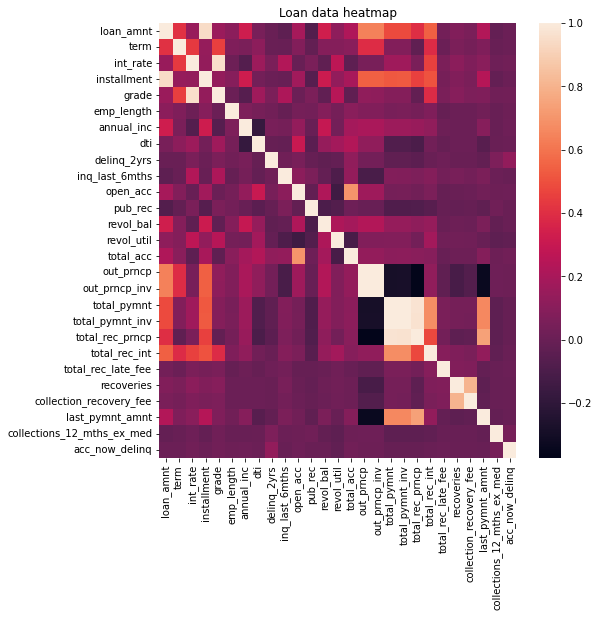

In [12]:
# Exploring correlations

plt.figure(figsize=(8,8))
heat_map = sns.heatmap(df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 
        'zip_code', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq']].corr())
plt.title( "Loan data heatmap" )
plt.show()

# Most of the correlations what you would expect like loan amount and installment. 
# I see correlations between the below columns.
# Annual income and dti
# Interest rate and grade

# Dealing with Outliers

In [13]:
# As you can see from the below charts, DTI and Annual Income columns have extereme values.

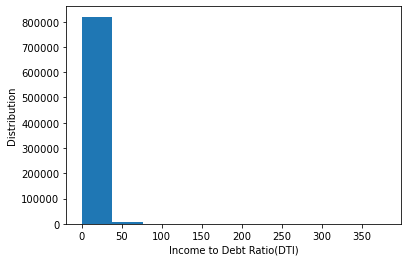

In [14]:
plt.hist(df['dti'])
plt.xlabel('Income to Debt Ratio(DTI)')
plt.ylabel('Distribution')
plt.show()

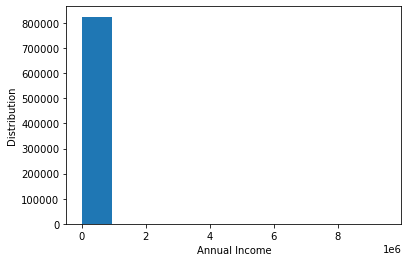

In [15]:
plt.hist(df['annual_inc'])
plt.xlabel('Annual Income')
plt.ylabel('Distribution')
plt.show()

In [16]:
# Checking the annual_inc column
df['annual_inc'].max()

9500000.0

In [17]:
# removing extereme values in the annual income column
inc_mean = df['annual_inc'].mean()
inc_std = df['annual_inc'].std()
Three_std = 3*inc_std
Three_std

196071.44670046447

In [18]:
# 99.7 Quantile
quantile_997 = df['annual_inc'].quantile(0.997)
quantile_997

379557.0000000298

In [19]:
# Removing the data that is above the 99.7 quantile of the annual income column. 
# I prefer the 99.7 quantile treshold than the 3 standard deviation because it removes less data.

df = df[df['annual_inc'] <= quantile_997]
print(df['annual_inc'].max())

379000.0


In [20]:
# Checking the annual_inc column
print('max dti', df['dti'].max())

# 99.7 Quantile
dti_997 = df['dti'].quantile(0.997)
print('dti 99.7 percentile', quantile_997)

max dti 380.53
dti 99.7 percentile 379557.0000000298


In [21]:
# Removing the data that is above the 99.7 quantile. 

df = df[df['dti'] <= dti_997]
print(df['dti'].max())

39.06


## DTI and Loan Status.

In [41]:
# Exploring the correlation between the loan status column and dti.

loan_status_dti = df.groupby('loan_status')['dti'].median().sort_values()
loan_status_dti

loan_status
Fully Paid            15.730
Issued                16.885
Current               18.140
Charged Off           18.260
Late (16-30 days)     18.850
In Grace Period       19.200
Late (31-120 days)    19.440
Default               19.690
Name: dti, dtype: float64

In [43]:
# dti - Loan to income ratio. The smaller value the better.

loan_status_dti.values

array([15.73 , 16.885, 18.14 , 18.26 , 18.85 , 19.2  , 19.44 , 19.69 ])

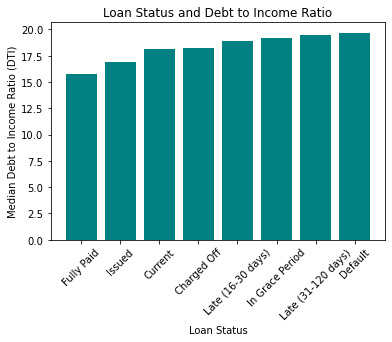

In [51]:
fig, ax = plt.subplots()
ax.bar(loan_status_dti.index, loan_status_dti.values, color='teal')
plt.xlabel('Loan Status')
plt.ylabel('Median Debt to Income Ratio (DTI)')
plt.title('Loan Status and Debt to Income Ratio')
plt.xticks(rotation=45)
plt.show()



As expected, the data shows that the bad loan statuses correspond to higher median dti value 
and the good loan statuses correspond with low dti value.

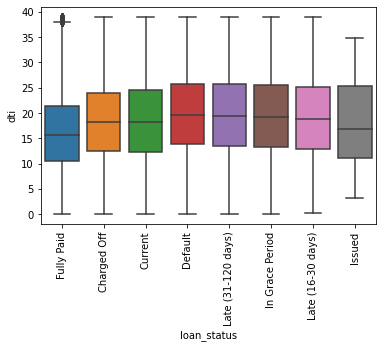

In [56]:
# I will do this plot after excluding the extreme value in current.
_ = sns.boxplot(x='loan_status', y='dti', data=df)
plt.xticks(rotation=90)
plt.show()

# With the exception of charged off, bad loan statuses correspond with higher dti value.

# encoding the loan status column as good (value 0) and bad (value 1)

In [57]:
# loan_status will be my target variable.
# charged off - substantially delinquent, loan unlikely to be collected.
# in grace period - late fee is waived if the financial obligation is satisfied within that period. 
# I will consider 'in grace period' as a good status.
# Combining loan status values to 'good', which will be 0 or 'bad', which will be 1.

df['loan_status'].value_counts() 

# Good loans will be 0 and bad loans will be 1
df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Current','Fully Paid','In Grace Period','Issued'], 0))
df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Charged Off','Late (31-120 days)','Late (16-30 days)','Default'], 1))
df['loan_status'].value_counts()

0    763806
1     56748
Name: loan_status, dtype: int64

# Loan Status and dti

In [199]:

print('median dti for those in bad loan status', df[df['loan_status'] == 1]['dti'].median())
print('mean dti for those in bad loan status', df[df['loan_status'] == 1]['dti'].mean())
print('Standard deviation of dti for those in bad loan status', df[df['loan_status'] == 1]['dti'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles for those in bad loan status', np.percentile(df[df['loan_status'] == 1]['dti'], (5, 25, 50, 75, 95)))

print('median dti for those in good loan status', df[df['loan_status'] == 0]['dti'].median())
print('mean dti for those in good loan status', df[df['loan_status'] == 0]['dti'].mean())
print('Standard deviation of dti for those in good loan status', df[df['loan_status'] == 0]['dti'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles for those in good loan status', np.percentile(df[df['loan_status'] == 0]['dti'], (5, 25, 50, 75, 95)))


median dti for those in bad loan status 18.52
mean dti for those in bad loan status 18.617327130471686
Standard deviation of dti for those in bad loan status 7.99269219480928
5th, 25th, 50th, 75th, and 95th percentiles for those in bad loan status [ 5.52 12.73 18.52 24.34 32.13]
median dti for those in good loan status 17.48
mean dti for those in good loan status 17.95628050840123
Standard deviation of dti for those in good loan status 8.177605621908466
5th, 25th, 50th, 75th, and 95th percentiles for those in good loan status [ 5.21   11.82   17.48   23.7    32.3675]


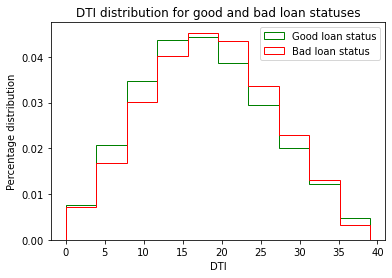

In [61]:

_ = plt.hist(df[df['loan_status'] == 0]['dti'], histtype='step', density = True, color='green', label='Good loan status')
_ = plt.hist(df[df['loan_status'] == 1]['dti'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.title('DTI distribution for good and bad loan statuses')
_ = plt.xlabel('DTI')
_ = plt.ylabel('Percentage distribution')

plt.legend()

plt.show()

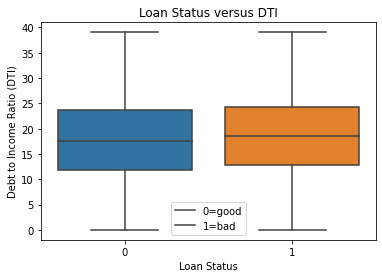

In [60]:
_ = sns.boxplot(x='loan_status', y='dti', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio (DTI)')
plt.title('Loan Status versus DTI')
plt.legend(labels=['0=good', '1=bad'])
plt.show()

In [185]:
# Those customers with loan's in bad status have a little bit higher dti on average than those in good loan status.

# Loan Status and Interest Rate

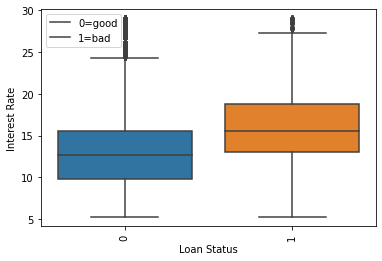

In [186]:

_ = sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.legend(labels=['0=good', '1=bad'])
plt.show()

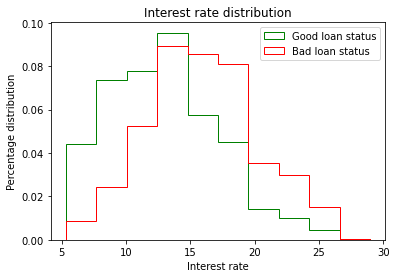

In [187]:
# Comparing interest rate distribution for bad status borrowers versus those in good status.

_ = plt.hist(df[df['loan_status'] == 0]['int_rate'], histtype='step', density = True, color='green', label='Good loan status')
_ = plt.hist(df[df['loan_status'] == 1]['int_rate'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Interest rate')
_ = plt.ylabel('Percentage distribution')
_ = plt.title('Interest rate distribution')
plt.legend()

plt.show()

# Employment Length and Loan Status

In [188]:
# Comparing the employment length of the borrowers who are in bad status versus the interest rate of all borrowers.

print('Employment length for borrowers in bad loan status')
print('Mean: ', df[df['loan_status'] == 1]['emp_length'].mean())
print('Median: ', df[df['loan_status'] == 1]['emp_length'].median())
print('Standard deviation: ', df[df['loan_status'] == 1]['emp_length'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles: ', np.percentile(df[df['loan_status'] == 1]['emp_length'], (5, 25, 50, 75, 95)))

Employment length for borrowers in bad loan status
Mean:  5.7962923803482065
Median:  6.0
Standard deviation:  3.634850344622045
5th, 25th, 50th, 75th, and 95th percentiles:  [ 0.  2.  6. 10. 10.]


In [189]:
print('Employment length for borrowers in good loan status')
print('Mean: ', df[df['loan_status'] == 0]['emp_length'].mean())
print('Median: ', df[df['loan_status'] == 0]['emp_length'].median())
print('Standard deviation: ', df[df['loan_status'] == 0]['emp_length'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles: ', np.percentile(df[df['loan_status'] == 0]['emp_length'], (5, 25, 50, 75, 95)))

Employment length for borrowers in good loan status
Mean:  6.024901611142096
Median:  6.0
Standard deviation:  3.66599683955587
5th, 25th, 50th, 75th, and 95th percentiles:  [ 0.  3.  6. 10. 10.]


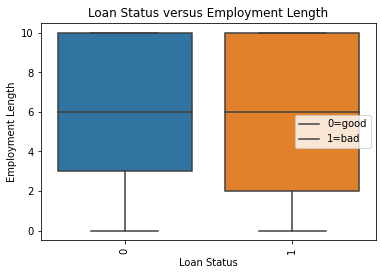

In [62]:
_ = sns.boxplot(x='loan_status', y='emp_length', data=df)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Employment Length')
plt.title('Loan Status versus Employment Length')
plt.legend(labels=['0=good', '1=bad'])
plt.show()

In [191]:
# There is not a significant difference in employment length between those in bad loan status versus those in good status.

# Annual Income and Loan Status

In [192]:
# Comparing the annual income of the borrowers who are in bad status versus those in good loan status.

print('Annual income for borrowers in bad loan status')
print('Mean: ', df[df['loan_status'] == 1]['annual_inc'].mean())
print('Median: ', df[df['loan_status'] == 1]['annual_inc'].median())
print('Standard deviation: ', df[df['loan_status'] == 1]['annual_inc'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles: ', np.percentile(df[df['loan_status'] == 1]['annual_inc'], (5, 25, 50, 75, 95)))

Annual income for borrowers in bad loan status
Mean:  66837.39690332697
Median:  59000.0
Standard deviation:  37311.9168726578
5th, 25th, 50th, 75th, and 95th percentiles:  [ 27000.  42000.  59000.  80000. 135000.]


In [193]:
# Summary statistics of Annual income for those in good loan status.

print('Annual income of borrowers in good loan status')
print('Mean: ', df[df['loan_status'] == 0]['annual_inc'].mean())
print('Median: ', df[df['loan_status'] == 0]['annual_inc'].median())
print('Standard deviation: ', df[df['loan_status'] == 0]['annual_inc'].std())
print('5th, 25th, 50th, 75th, and 95th percentiles: ', np.percentile(df[df['loan_status'] == 0]['annual_inc'], (5, 25, 50, 75, 95)))

Annual income of borrowers in good loan status
Mean:  75218.18032348534
Median:  65000.0
Standard deviation:  42145.359066450226
5th, 25th, 50th, 75th, and 95th percentiles:  [ 30000.  47300.  65000.  91000. 150000.]


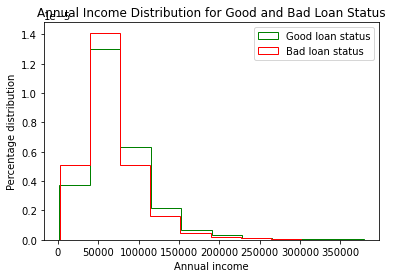

In [63]:

_ = plt.hist(df[df['loan_status'] == 0]['annual_inc'], histtype='step', density = True, color='green', label='Good loan status')
_ = plt.hist(df[df['loan_status'] == 1]['annual_inc'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Annual income')
_ = plt.ylabel('Percentage distribution')
_ = plt.title('Annual Income Distribution for Good and Bad Loan Status')
plt.legend()

plt.show()

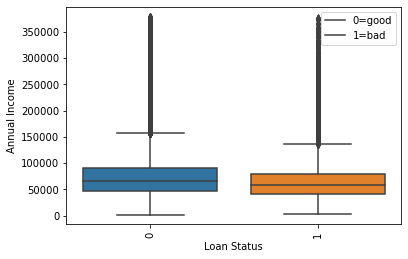

In [64]:
_ = sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.legend(labels=['0=good', '1=bad'])
plt.show()

In [196]:
# It looks like those in good loan status have higher income on average than those in bad loan status.

In [197]:
# The data likely needs more cleaning in the next steps.

In [198]:
# Save the data in a csv file.
df.to_csv('../data/interim/Loan_0715_after_eda.csv',index=False)